In [1]:
using DelimitedFiles
using Plots, LaTeXStrings
using Plots.PlotMeasures
using JLD2

In [2]:
rpa,_ = readdlm("/home/julisn/Downloads/rpa.csv", ',', header=true);
rpa_λ ,_ = readdlm("/home/julisn/Downloads/lambda-rpa-magnetic-old-data.csv", ',', header=true);
#rpa = permutedims(rpa, [2,1])
#rpa_λ = permutedims(rpa_λ, [2,1])
lDGA,header = readdlm("/home/julisn/Downloads/TN_data.csv", ',', header=true)
all_TN,header = readdlm("/home/julisn/Downloads/TN_df.csv", ',', header=true)

(Any[1.0 0.04153713280802306 … "(0.04139681362653284, 0.04167745198951329)" "(0.055458676168851924, 0.05613343814833515)"; 1.25 0.050543028109325566 … "(-0.09385220657637464, 0.19493826279502577)" "(0.06655107940929571, 0.06658499894456892)"; … ; 3.5 0.047253184040308545 … "(0.04718211378021497, 0.04732425430040212)" "(0.04508670413636198, 0.0492610704658748)"; 4.0 0.04168740771102414 … "(0.041635877559731554, 0.04173893786231672)" "(0.041773180848355795, 0.04192928936981642)"], AbstractString["U" "TN_λm" … "Confidence_λm" "Confidence_λdm"])

In [3]:
println(header)

AbstractString["U" "TN_λm" "γ_λm" "TN_λdm" "γ_λdm" "TN_DMFT" "NPoints" "Confidence_λm" "Confidence_λdm"]


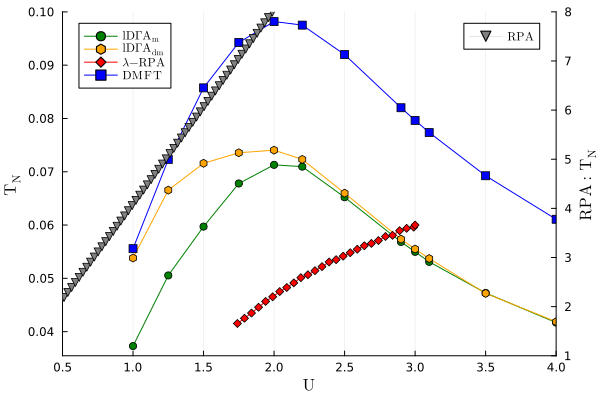

In [4]:
#plot(rpa[:,2], rpa[:,1], markershape=:auto, label=L"\mathrm{RPA}")


plot(lDGA[:,1], lDGA[:,2], xlims=(0.5,4), markershape=:circle, legend=:topleft, color=:green, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(lDGA[:,1], lDGA[:,3], markershape=:hexagon, color=:orange, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(rpa_λ[:,2], rpa_λ[:,1], markershape=:diamond, color=:red, label=L"\lambda\mathrm{-RPA}", xlabel=L"\mathrm{U}", ylabel=L"\mathrm{T}_\mathrm{N}")
plot!(all_TN[:,1], all_TN[:,6], markershape=:square, color=:blue, label=L"\mathrm{DMFT}")
p1 = twinx()
plot!(p1, rpa[:,2], rpa[:,1], markershape=:dtriangle, color=:grey, lw=0, xlims=(0.5,4), ylims=(1,8), label=L"\mathrm{RPA}", ylabel=L"\mathrm{RPA: }\mathrm{T}_\mathrm{N}")
#savefig("PD_rpa_ldga.pdf")

In [11]:
using Pkg
Pkg.activate("/home/julisn/Codes/LadderDGA.jl_bak")
using LadderDGA
using OffsetArrays
using LaTeXStrings

f2d = jldopen("/home/julisn/Hamburg/Zwischenergebnisse/HLRN_2324/2D_ldm.jld2","r")
f3d = jldopen("/home/julisn/Hamburg/Zwischenergebnisse/HLRN_2324/3D_ldm.jld2","r")
kG2d = gen_kGrid("2Dsc-0.25",40)
kG3d = gen_kGrid("3Dsc-0.204124", 20)

kAN_2D_v = (π, 0)
kN_2D_v  = (π/2, π/2)
kAN_3D_v = (π, π/2, 0)
kN_3D_v  = (π/2, π/2, π/2)

kAN_2D = findfirst(x-> all(x .≈ kAN_2D_v) ,kG2d.kGrid)
kN_2D = findfirst(x-> all(x .≈ kN_2D_v) ,kG2d.kGrid)

kAN_3D = findfirst(x-> all(x .≈ kAN_3D_v) ,kG3d.kGrid)
kN_3D = findfirst(x-> all(x .≈ kN_3D_v) ,kG3d.kGrid);

  Activating project at `~/Codes/LadderDGA.jl_bak`


In [210]:
νarr = imag(LadderDGA.iν_array(12.0, size(f2d["res_m"].Σ_ladder.parent,2)))[1:20];

Σm_AN_2D = imag(f2d["res_m"].Σ_ladder.parent[kAN_2D,1:length(νarr)])
Σm_N_2D = imag(f2d["res_m"].Σ_ladder.parent[kN_2D,1:length(νarr)])

Σdm_AN_2D = imag(f2d["res_dm"].Σ_ladder.parent[kAN_2D,1:length(νarr)])
Σdm_N_2D = imag(f2d["res_dm"].Σ_ladder.parent[kN_2D,1:length(νarr)])

Σdmsc_AN_2D = imag(f2d["res_dm_sc"].Σ_ladder.parent[kAN_2D,1:length(νarr)])
Σdmsc_N_2D = imag(f2d["res_dm_sc"].Σ_ladder.parent[kN_2D,1:length(νarr)])

Σm_AN_3D = imag(f3d["res_m"].Σ_ladder.parent[kAN_3D,1:length(νarr)])
Σm_N_3D = imag(f3d["res_m"].Σ_ladder.parent[kN_3D,1:length(νarr)])

Σdm_AN_3D = imag(f3d["res_dm"].Σ_ladder.parent[kAN_3D,1:length(νarr)])
Σdm_N_3D = imag(f3d["res_dm"].Σ_ladder.parent[kN_3D,1:length(νarr)])

Σdmsc_AN_3D = imag(f3d["res_dm_sc"].Σ_ladder.parent[kAN_3D,1:length(νarr)])
Σdmsc_N_3D = imag(f3d["res_dm_sc"].Σ_ladder.parent[kN_3D,1:length(νarr)]);

ΣDMFT_compl = f2d["lDGAHelper"].Σ_loc.parent[1:length(νarr)];
ΣDMFT = imag(f2d["lDGAHelper"].Σ_loc.parent[1:length(νarr)]);

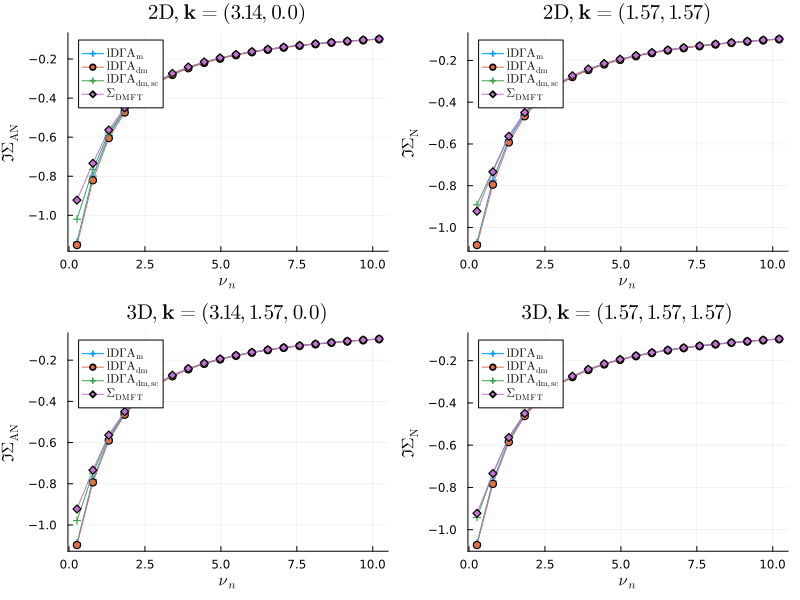

In [211]:
p1 = plot(νarr, Σm_AN_2D, markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{AN}", title=L"2\mathrm{D}, \mathbf{k} = %$(round.(kAN_2D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_AN_2D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_AN_2D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, ΣDMFT, markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")

p2 = plot(νarr, Σm_N_2D, markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{N}", title=L"2\mathrm{D}, \mathbf{k} = %$(round.(kN_2D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_N_2D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_N_2D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, ΣDMFT, markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")

p3 = plot(νarr, Σm_AN_3D, markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{AN}", title=L"3\mathrm{D}, \mathbf{k} = %$(round.(kAN_3D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_AN_3D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_AN_3D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, ΣDMFT, markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")

p4 = plot(νarr, Σm_N_3D, markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{N}", title=L"3\mathrm{D}, \mathbf{k} = %$(round.(kN_3D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_N_3D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_N_3D, markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, ΣDMFT, markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")


pp = plot(p1, p2, p3, p4, size=(800,600))
savefig("~/Downloads/sigma_comp.pdf")
display(pp)

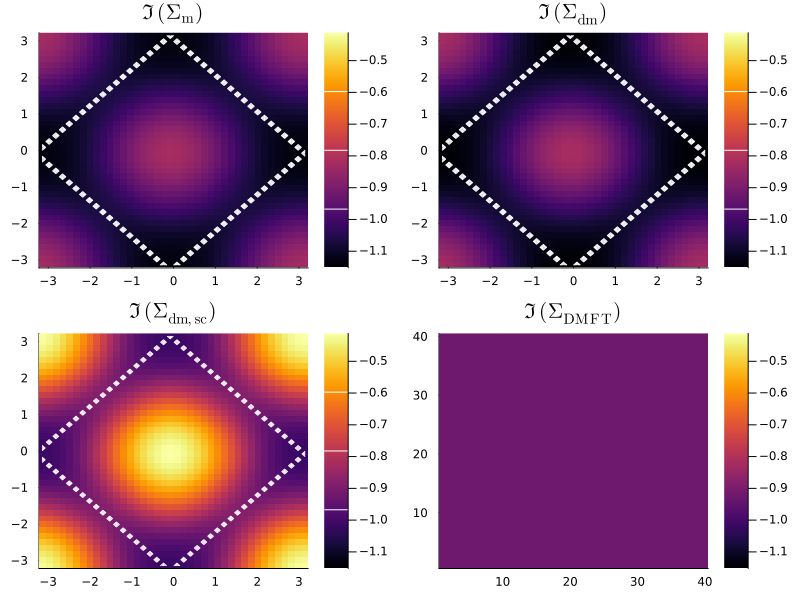

In [230]:
Ns = 40
kG2d = gen_kGrid("2Dsc-0.25-0.0-0.0",Ns)
kx = ky = LinRange(-π,π, Ns)

Σ_lDGA_m = LadderDGA.expandKArr(kG2d, f2d["res_m"].Σ_ladder.parent[:,1])
Σ_lDGA_dm = LadderDGA.expandKArr(kG2d, f2d["res_dm"].Σ_ladder.parent[:,1])
Σ_lDGA_dmsc = LadderDGA.expandKArr(kG2d, f2d["res_dm_sc"].Σ_ladder.parent[:,1])

ef_lDGA_m, rc_m = LadderDGA.estimate_connected_ef(f2d["res_m"].Σ_ladder, kG2d, f2d["lDGAHelper"].mP)
ef_lDGA_m = minimum(imag(Σ_lDGA_m)) .* LadderDGA.expandKArr(kG2d, convert.(Float64,ef_lDGA_m))
ef_lDGA_dm, rc_dm = LadderDGA.estimate_connected_ef(f2d["res_dm"].Σ_ladder, kG2d, f2d["lDGAHelper"].mP)
ef_lDGA_dm = minimum(imag(Σ_lDGA_dm)) .* LadderDGA.expandKArr(kG2d, convert.(Float64,ef_lDGA_dm))
ef_lDGA_dm_sc, rc_dm_sc = LadderDGA.estimate_connected_ef(f2d["res_dm_sc"].Σ_ladder, kG2d, f2d["lDGAHelper"].mP)
ef_lDGA_dm_sc = minimum(imag(Σ_lDGA_dmsc)) .* LadderDGA.expandKArr(kG2d, convert.(Float64,ef_lDGA_dm_sc))
colorscale = (minimum([minimum(imag(Σ_lDGA_m)), minimum(imag(Σ_lDGA_dm)), minimum(imag(Σ_lDGA_dmsc))]), maximum([maximum(imag(Σ_lDGA_m)), maximum(imag(Σ_lDGA_dm)), maximum(imag(Σ_lDGA_dmsc))]))

#p1 = contour(imag(Σ_lDGA_m), color=:turbo, clabels=true, cbar=true, lw=2, levels=12)
p1 = heatmap(kx, ky, imag(Σ_lDGA_m), cbar=true, clims=colorscale, title=L"\Im (\Sigma_\mathrm{m})")
p1 = contour!(p1, kx, ky, ef_lDGA_m, levels=3, color=:white)

p2 = heatmap(kx, ky, imag(Σ_lDGA_dm), cbar=true, clims=colorscale, title=L"\Im (\Sigma_\mathrm{dm})")
p2 = contour!(p2, kx, ky, ef_lDGA_dm, levels=3, color=:white)

p3 = heatmap(kx, ky, imag(Σ_lDGA_dmsc), cbar=true, clims=colorscale, title=L"\Im (\Sigma_\mathrm{dm,sc})")
p3 = contour!(p3, kx, ky, ef_lDGA_dm_sc, levels=3, color=:white)

p4 = heatmap(repeat([ΣDMFT[1]], 40, 40), clims=colorscale, title=L"\Im (\Sigma_\mathrm{DMFT})")

pp = plot(p1, p2, p3, p4, size=(800,600))
savefig("~/Downloads/sigma_heatmap_ef.pdf")
display(pp)

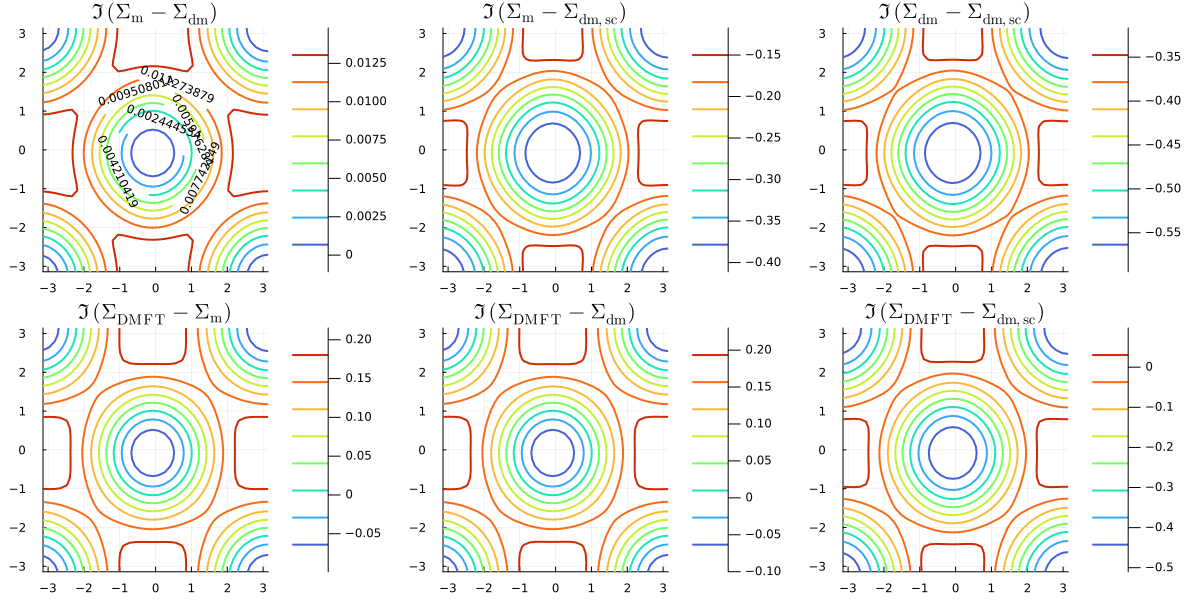

In [239]:
#p1 = contour(imag(Σ_lDGA_m), color=:turbo, clabels=true, cbar=true, lw=2, levels=12)
p1 = contour(kx, ky, imag(Σ_lDGA_m .- Σ_lDGA_dm), title=L"\Im (\Sigma_\mathrm{m} - \Sigma_\mathrm{dm})", color=:turbo, clabels=true, cbar=true, lw=2, levels=8)
#p1 = contour!(p1, kx, ky, ef_lDGA_m, levels=2, color=:black)

p2 = contour(kx, ky, imag(Σ_lDGA_m .- Σ_lDGA_dmsc), title=L"\Im (\Sigma_\mathrm{m} - \Sigma_\mathrm{dm,sc})", color=:turbo, clabels=false, cbar=true, lw=2, levels=8)
#p2 = contour!(p2, kx, ky, ef_lDGA_dm, levels=3, color=:white)

p3 = contour(kx, ky, imag(Σ_lDGA_dm .- Σ_lDGA_dmsc) .+ 0.2 .* ΣDMFT[1], title=L"\Im (\Sigma_\mathrm{dm} - \Sigma_\mathrm{dm,sc})", color=:turbo, clabels=false, cbar=true, lw=2, levels=8)
#p3 = contour!(p3, kx, ky, ef_lDGA_dm_sc, levels=3, color=:white)

p4 = contour(kx, ky, imag(ΣDMFT_compl[1] .- Σ_lDGA_m), title=L"\Im (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{m})", color=:turbo, clabels=false, cbar=true, lw=2, levels=8)

p5 = contour(kx, ky, imag(ΣDMFT_compl[1] .- Σ_lDGA_dm) , title=L"\Im (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{dm})", color=:turbo, clabels=false, cbar=true, lw=2, levels=8)

p6 = contour(kx, ky, imag(ΣDMFT_compl[1] .- Σ_lDGA_dmsc), title=L"\Im (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{dm,sc})", color=:turbo, clabels=false, cbar=true, lw=2, levels=8)

pp = plot(p1, p2, p3, p4, p5, p6, size=(1200,600))
savefig("~/Downloads/sigma_heatmap_comp_im.pdf")
display(pp)

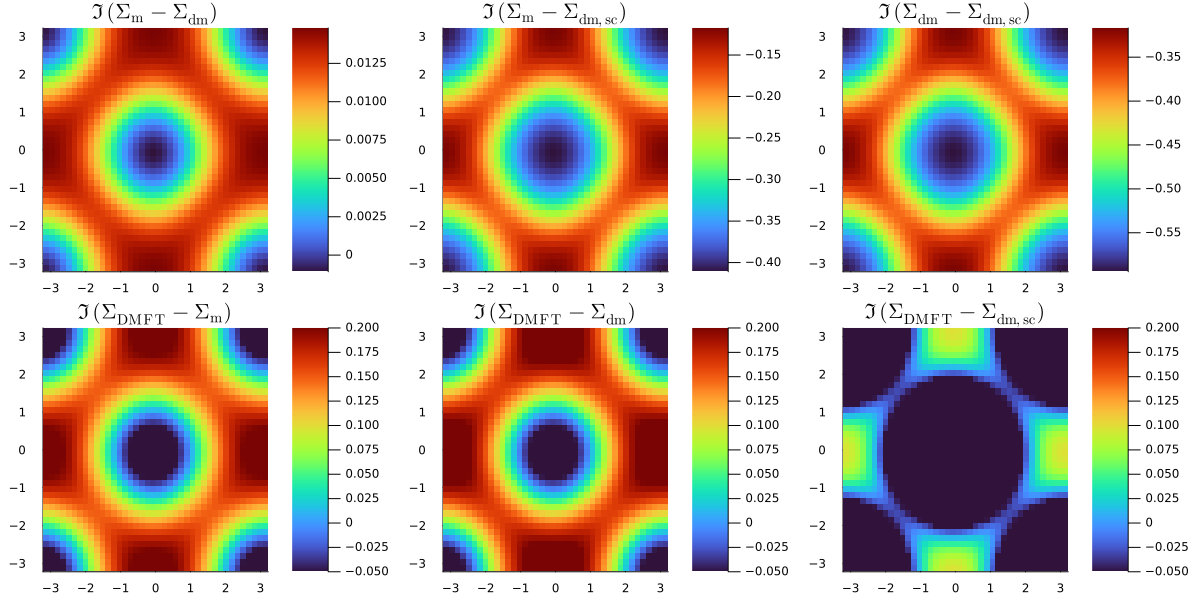

In [253]:
#p1 = contour(imag(Σ_lDGA_m), color=:turbo, clabels=true, cbar=true, lw=2, levels=12)
p1 = heatmap(kx, ky, imag(Σ_lDGA_m .- Σ_lDGA_dm), title=L"\Im (\Sigma_\mathrm{m} - \Sigma_\mathrm{dm})", color=:turbo, cbar=true)
#p1 = contour!(p1, kx, ky, ef_lDGA_m, levels=2, color=:black)

p2 = heatmap(kx, ky, imag(Σ_lDGA_m .- Σ_lDGA_dmsc), title=L"\Im (\Sigma_\mathrm{m} - \Sigma_\mathrm{dm,sc})", color=:turbo, cbar=true)
#p2 = contour!(p2, kx, ky, ef_lDGA_dm, levels=3, color=:white)

p3 = heatmap(kx, ky, imag(Σ_lDGA_dm .- Σ_lDGA_dmsc) .+ 0.2 .* ΣDMFT[1], title=L"\Im (\Sigma_\mathrm{dm} - \Sigma_\mathrm{dm,sc})", color=:turbo, cbar=true)
#p3 = contour!(p3, kx, ky, ef_lDGA_dm_sc, levels=3, color=:white)

p4 = heatmap(kx, ky, imag(ΣDMFT_compl[1] .- Σ_lDGA_m), title=L"\Im (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{m})", color=:turbo, cbar=true,clims=(-0.05,0.2))

p5 = heatmap(kx, ky, imag(ΣDMFT_compl[1] .- Σ_lDGA_dm) , title=L"\Im (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{dm})", color=:turbo, cbar=true,clims=(-0.05,0.2))

p6 = heatmap(kx, ky, imag(ΣDMFT_compl[1] .- Σ_lDGA_dmsc), title=L"\Im (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{dm,sc})", color=:turbo, cbar=true,clims=(-0.05,0.2))

pp = plot(p1, p2, p3, p4, p5, p6, size=(1200,600))
savefig("~/Downloads/sigma_heatmap_comp_im_2.pdf")
display(pp)

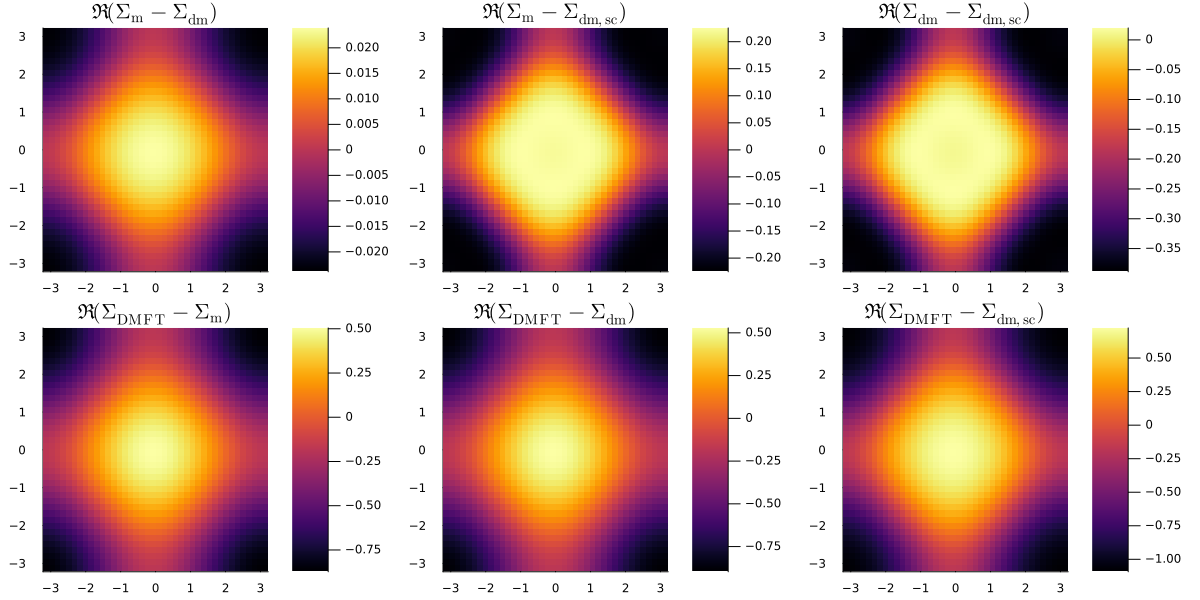

In [229]:
#p1 = contour(imag(Σ_lDGA_m), color=:turbo, clabels=true, cbar=true, lw=2, levels=12)
p1 = heatmap(kx, ky, real(Σ_lDGA_m .- Σ_lDGA_dm), cbar=true, title=L"\Re (\Sigma_\mathrm{m} - \Sigma_\mathrm{dm})")
#p1 = contour!(p1, kx, ky, ef_lDGA_m, levels=3, color=:white)

p2 = heatmap(kx, ky, real(Σ_lDGA_m .- Σ_lDGA_dmsc), cbar=true, title=L"\Re (\Sigma_\mathrm{m} - \Sigma_\mathrm{dm,sc})")
#p2 = contour!(p2, kx, ky, ef_lDGA_dm, levels=3, color=:white)

p3 = heatmap(kx, ky, real(Σ_lDGA_dm .- Σ_lDGA_dmsc) .+ 0.2 .* ΣDMFT[1], cbar=true, title=L"\Re (\Sigma_\mathrm{dm} - \Sigma_\mathrm{dm,sc})")
#p3 = contour!(p3, kx, ky, ef_lDGA_dm_sc, levels=3, color=:white)

p4 = heatmap(kx, ky, real(ΣDMFT_compl[1] .- Σ_lDGA_m) .+ 0.2 .* ΣDMFT[1], cbar=true, title=L"\Re (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{m})")

p5 = heatmap(kx, ky, real(ΣDMFT_compl[1] .- Σ_lDGA_dm) .+ 0.2 .* ΣDMFT[1], cbar=true, title=L"\Re (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{dm})")

p6 = heatmap(kx, ky, real(ΣDMFT_compl[1] .- Σ_lDGA_dmsc) .+ 0.2 .* ΣDMFT[1], cbar=true, title=L"\Re (\Sigma_\mathrm{DMFT} - \Sigma_\mathrm{dm,sc})")

pp = plot(p1, p2, p3, p4, p5, p6, size=(1200,600))
savefig("~/Downloads/sigma_heatmap_comp_re.pdf")
display(pp)

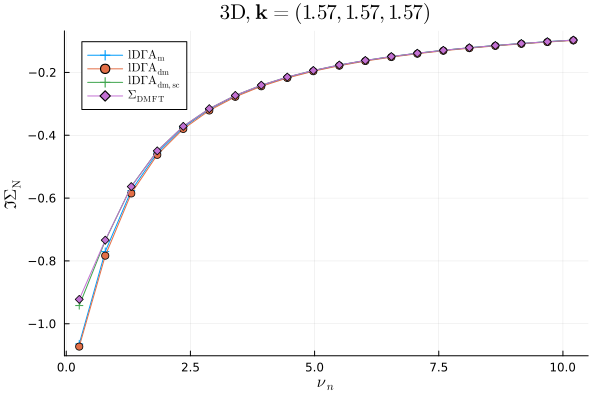

In [215]:

p1 = plot(νarr, Σm_AN_2D[1:length(νarr)], markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{AN}", title=L"2\mathrm{D}, \mathbf{k} = %$(round.(kAN_2D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_AN_2D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_AN_2D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, imag(f2d["lDGAHelper"].Σ_loc.parent[1:length(νarr)]), markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")

p2 = plot(νarr, Σm_N_2D[1:length(νarr)], markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{N}", title=L"2\mathrm{D}, \mathbf{k} = %$(round.(kN_2D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_N_2D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_N_2D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, imag(f2d["lDGAHelper"].Σ_loc.parent[1:length(νarr)]), markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")

p3 = plot(νarr, Σm_AN_3D[1:length(νarr)], markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{AN}", title=L"3\mathrm{D}, \mathbf{k} = %$(round.(kAN_3D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_AN_3D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_AN_3D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, imag(f2d["lDGAHelper"].Σ_loc.parent[1:length(νarr)]), markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")

p4 = plot(νarr, Σm_N_3D[1:length(νarr)], markershape=:auto, xlabel=L"\nu_n", ylabel=L"\Im \Sigma_\mathrm{N}", title=L"3\mathrm{D}, \mathbf{k} = %$(round.(kN_3D_v, digits=2))", label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{m}")
plot!(νarr, Σdm_N_3D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm}")
plot!(νarr, Σdmsc_N_3D[1:length(νarr)], markershape=:auto, label=L"\mathrm{lD}\Gamma\mathrm{A}_\mathrm{dm,sc}")
plot!(νarr, imag(f2d["lDGAHelper"].Σ_loc.parent[1:length(νarr)]), markershape=:auto, label=L"\Sigma_\mathrm{DMFT}")

In [34]:
println(f2d["lDGAHelper"].mP)
println("λm = ", f2d["res_m"].λm, "; λd = ", f2d["res_m"].λd, "; EPot1 = ", f2d["res_m"].EPot_p1, "; EPot2 = ", f2d["res_m"].EPot_p2,"; EKin = ", f2d["res_m"].EKin)
println("λm = ", f2d["res_dm"].λm, "; λd = ", f2d["res_dm"].λd, "; EPot = ", f2d["res_dm"].EPot_p1, "; EKin = ", f2d["res_dm"].EKin) 
println("λm = ", f2d["res_dm_sc"].λm, "; λd = ", f2d["res_dm_sc"].λd, "; EPot = ", f2d["res_dm_sc"].EPot_p1, "; EKin = ", f2d["res_dm_sc"].EKin) 

U=2.0, β=12.0, n=0.9999989053357231, μ=1.0
DMFT Energies: T=-0.17262581717936176, V=0.10248546238218248

λm = 0.07713723625148691; λd = 0.0; EPot1 = 0.09038369097901901; EPot2 = 0.09975186066059721; EKin = -0.19258594412789046
λm = 0.07485223422348469; λd = 5.266075599763046; EPot = 0.08555776851608869; EKin = -0.19167351187469298
λm = 0.07709018534032436; λd = 0.08260431334006345; EPot = 0.09946877940438804; EKin = -0.21170448054976873


In [35]:
println(f2d["lDGAHelper"].mP)
println("λm = ", f3d["res_m"].λm, "; λd = ", f3d["res_m"].λd, "; EPot = ", f3d["res_m"].EPot_p1, "; EPot2 = ", f2d["res_m"].EPot_p2, "; EKin = ", f3d["res_m"].EKin)
println("λm = ", f3d["res_dm"].λm, "; λd = ", f3d["res_dm"].λd, "; EPot = ", f3d["res_dm"].EPot_p1, "; EKin = ", f3d["res_dm"].EKin) 
#println("λm = ", f3d["res_dm_sc"].λm, "; λd = ", f3d["res_dm_sc"].λd, "; EPot = ", f3d["res_dm_sc"].EPot_p1, "; EKin = ", f3d["res_dm_sc"].EKin) 

U=2.0, β=12.0, n=0.9999989053357231, μ=1.0
DMFT Energies: T=-0.17262581717936176, V=0.10248546238218248

λm = 0.05357694042915804; λd = 0.0; EPot = 0.09163018047045941; EPot2 = 0.09975186066059721; EKin = -0.18365361029945118
λm = 0.05217206341371717; λd = 3.2726676649363537; EPot = 0.08857366294550113; EKin = -0.18309306755539057
